My solutions for Homework2 in IE7275 Data Mining in Engineering

# Homework 2

**Before you start:** Read Chapter 3 Data Visualization and Chapter 4 Dimension Reduction in the textbook.

**Note:** Please make sure your plots are complete and presentable with a title, proper axis names, labels and legends if applicable.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start. 

Alternative solutions are welcomed.

## Part 1: Advanced Data Visualization

### Problem 1 ##

**Dataset:** [Mismanaged waste](https://ourworldindata.org/grapher/mismanaged-plastic-waste?tab=chart&time=earliest..latest)

**Introduction:** Jambeck et al. quantified municipal and plastic waste streams from coastal populations in 2010 with projections to the year 2025. The authors define mismanaged and inadequately managed waste as follows: "mismanaged waste is material that is either littered or inadequately disposed. Inadequately disposed waste is not formally managed and includes disposal in dumps or open, uncontrolled landfills, where it is not fully contained. Mismanaged waste could eventually enter the ocean via inland waterways,
wastewater outflows, and transport by wind or tides. "

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("mismanaged-waste-global-total.csv") 
df.head()

Saving mismanaged-waste-global-total.csv to mismanaged-waste-global-total.csv


,Entity,Code,Year,Mismanaged waste (% global total) (% of global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039


**TODO:**

*  Use a choropleth map to present the amount of mismanaged waste by country
*   The label (hover) should include the country name and percentage of mismanaged waste
*  Interpret your key findings from the map graph
*  Considering the manufacturing volume of each country, is this graph misleading?

In [ ]:
# Explore the dataset
print(df.shape)

# Check if 'Mismanaged waste (% global total) (% of global total)' column is actually in % or if I need to multiply it by 100
# It's in %
print(df['Mismanaged waste (% global total) (% of global total)'].sum())

# Since the current 'Mismanaged waste (% global total) (% of global total)' column has 4 decimals, I will round them to 2 decimal places for better readability
df['Mismanaged waste (% global total)'] = round(df['Mismanaged waste (% global total) (% of global total)'], 2)
df.head()

(186, 4)
100.0


,Entity,Code,Year,Mismanaged waste (% global total) (% of global total),Mismanaged waste (% global total)
0,Albania,ALB,2010,0.0933,0.09
1,Algeria,DZA,2010,1.6347,1.63
2,Angola,AGO,2010,0.1964,0.20
3,Anguilla,AIA,2010,0.0002,0.00
4,Antigua and Barbuda,ATG,2010,0.0039,0.00


In [ ]:
fig = px.choropleth(df,
                    locationmode='country names',
                    locations='Entity',
                    color='Mismanaged waste (% global total)',
                    hover_data=['Entity', 'Mismanaged waste (% global total)'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Choropleth Map for Mismanaged waste (% global total)'
                    )

fig.show()


# References:
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html
# https://plotly.com/python/choropleth-maps/

**My Key Findings**

I can see that the countries with high Mismanaged Waste % are in East and South East Asia such as China and Indonesia.

Since Mismanaged waste is in % of the global total, it is not misleading. No matter what the manufacturing volume of each country is, the fact that China produces the highest % of Mismanaged waste followed by Indonesia does not change.

However, if we add the data about the manufacturing volumn of each country, it helps us to understand how each country's manufacturing volumn contributes to their Mismanaged waste.

**Hint:** 

* The variable "code" contains [three letters ISO country codes](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3). 
* [Use the built-in country code to create a choropleth map.](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries)



### Problem 2 ##

**Dataset:** [Plastic disposal dataset](https://ourworldindata.org/plastic-pollution)

**Information:** Plastic disposal dataset methods shows how has global plastic waste disposal method changed over time. In the chart we see the share of global plastic waste that is discarded, recycled or incinerated from 1980 through to 2015.


In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("activity.xlsx") 
df.head()

Saving activity.xlsx to activity.xlsx


,year,Value,Type
0,1960,88.1,Generation
1,1960,NaN,Composting*
2,1960,5.6,Recycling
3,1960,0.0,Combustion with energy recovery
4,1960,82.5,Landfilling and other disposal


**TODO:**
*  Use an animated bar chart to indicate the change of trash disposal method through the years
*  Interpret your key findings from the graph


In [ ]:
# Explore the dataset
print(df['year'].value_counts())
df.describe()

# We can see that the type 'Generation' is the total of all the methods
print(df.loc[df['Type'] != 'Generation'].groupby('year').sum())
print(df.loc[df['Type'] == 'Generation'])

1960    5
1970    5
1980    5
1990    5
2000    5
2005    5
2010    5
2015    5
2016    5
2017    5
Name: year, dtype: int64
      Value
year       
1960   88.1
1970  121.1
1980  151.6
1990  208.3
2000  243.5
2005  253.7
2010  251.1
2015  262.1
2016  266.8
2017  267.8
    year  Value        Type
0   1960   88.1  Generation
5   1970  121.1  Generation
10  1980  151.6  Generation
15  1990  208.3  Generation
20  2000  243.5  Generation
25  2005  253.7  Generation
30  2010  251.1  Generation
35  2015  262.1  Generation
40  2016  266.8  Generation
45  2017  267.8  Generation


In [ ]:
fig = px.bar(df, x="Type", 
             y="Value",
             animation_frame="year", 
             title="Change of Global Plastic Waste Disposal Method over time",
             range_y=[0,300])
fig.show()


# Reference:
# https://plotly.com/python-api-reference/generated/plotly.express.bar.html

**My Key Findings:**

It is intersting to see that even after almost 60 years, Landfilling and other disposal method has still the highest value among all methods.

However, the amounts of Composting, Recycling, and Combustion with energy recovery are gradually increasing, and we can see that we are moving towards these methods little by little.

**Hint:** [Animated Bar Charts with Plotly Express](https://plotly.com/python/animations/#animated-bar-charts-with-plotly-express)




### Problem 3 ##

**Dataset:** [Global Fortune 500](https://www.kaggle.com/edgarhuichen/fortune-global-500)

**Introduction:** Fortune Global 500 List is a list of largest corporations worldwide which are measured by their total fiscal year revenues. Companies rankings sorted by total revenues for their respective fiscal years ended on or before March 31 of the relevant year.

In [ ]:
#Upgrade the package "plotly" before you start to avoid future syntax error
#You only need to upgrade it once
!pip install plotly --upgrade

     |████████████████████████████████| 27.7 MB 67.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
#Import packages
import pandas as pd
import numpy as np
import plotly.express as px

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Global Fortune 500.csv") 
df.head()

Saving Global Fortune 500.csv to Global Fortune 500.csv


,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues($millions),Revenue Change,Profits($millions),Profit Change,Assets($millions),Unnamed: 10,Unnamed: 11
0,1,Walmart,USA,"2,300,000",1,485873,0.80%,13643,-7.20%,198825,NaN,NaN
1,2,State Grid,China,"926,067",2,315199,-4.40%,9571.3,-6.20%,489838,NaN,NaN
2,3,Sinopec Group,China,"713,288",4,267518,-9.10%,1257.9,-65.00%,310726,NaN,NaN
3,4,China National Petroleum,China,"1,512,048",3,262573,-12.30%,1867.5,-73.70%,585619,NaN,NaN
4,5,Toyota Motor,Japan,"364,445",8,254694,7.70%,16899.3,-12.30%,437575,NaN,NaN


**TODO:**
*  Build a treemap of the companies with "country" as the first hierarchy and "company" as the second hierarchy
*  The size of each block should indicate the corresponding company's revenue
*  Interpret your key findings from the treemap

In [ ]:
fig = px.treemap(df, 
                 path=['Country', 'Company Name'], 
                 values='Revenues($millions)',
                 hover_data=['Company Name', 'Revenues($millions)'],
                 title='Treemap - Company Revenues and their Countries')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

**My Key Findings**

The U.S.A. and China contribute to almost half of the total revenues in the dataset. 

Comparing USA and Japan, it is interesting to see that most of top companies are car or hardware manufactures in Japan, whereas there is more diversity such as car manufacture, Software, healthcare, grocery, or mobile in the USA.

**Hint:** [Build a treemap with Plotly](https://plotly.com/python/treemaps/)




**If you are interested (this part is not graded):**
*  Use the zooming and panning function to offer the users an option to zoom in any target country for a detailed analysis



### Problem 4 ##

**Dataset:** [Air Quality](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

**Introduction:** The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

In [ ]:
#Import required libraries
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Air Quality.xlsx") 
df.head()

Saving Air Quality.xlsx to Air Quality.xlsx


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**TODO:**
*  Plot a correlation heatmap for the Air Quality dataset
*  Interpret your key findings from the correlation heatmap

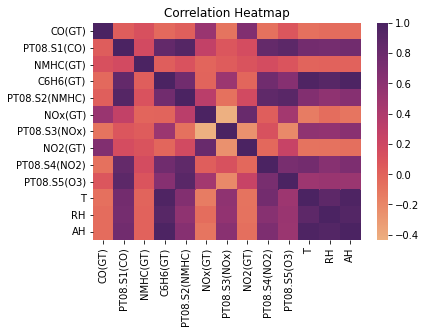

In [ ]:
import seaborn as sns

ax = sns.heatmap(df.corr(), cmap="flare")
_ = ax.set_title('Correlation Heatmap')

**My Key Findings**

Looking at the correlatin heatmap below, I can see some high correlation between some variables such as T and AH, T and C6H6(GT), or AH and C6H6(GT).

Thus, when using this dataset for some prediction, it is worth trying to handle these high correlations by removing some of these highly correlated variables since these higly correlated variables contain similar information to each other.

**Hint:** [Build a heatmap with Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Part 2: Dimension Reduction

### Problem 5

**Dataset:** [Wine Classification Dataset](https://archive.ics.uci.edu/ml/datasets/wine)

**Introduction:** These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [ ]:
#Import the built-in dataset (Wine recognition) for this problem
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
np.set_printoptions(suppress=True, precision=8)

wine = load_wine()
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']

In [ ]:
X['target'] = y

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# I don't use this so commenting out
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# I don't use this so commenting out
# X.to_csv('/content/drive/My Drive/wine.csv')

**TODO1:**

*  Calulate the first two principal component scores with eigen values and vectors on the RAW data (without standardization). 

*  Note that you are expected to perform matrix multiplication and eigen value calculation **only** with the package Numpy.

In [ ]:
# No need to worry about NaNs
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
# Drop the target variable
X_covariance = np.cov(X.iloc[:, :-1].T)

# Find eigen values and vectors
eigen_value, eigen_vectors = np.linalg.eig(X_covariance)
print(eigen_value)
print('-----')
print(eigen_vectors)

[99201.78951748   172.53526648     9.4381137      4.99117861
     1.22884523     0.84106387     0.27897352     0.15138127
     0.11209676     0.0082037      0.02107237     0.03757598
     0.0717026 ]
-----
[[-0.00165926 -0.00120341  0.01687381  0.14144678 -0.02033698  0.1941201
  -0.92328034  0.28482066  0.08660061  0.00802925  0.01565141 -0.01497151
  -0.002245  ]
 [ 0.00068102 -0.00215498  0.12200337  0.16038954  0.61288345  0.74247296
   0.15010994 -0.06467447  0.01566214 -0.01109039 -0.06729555 -0.02318765
  -0.01850935]
 [-0.00019491 -0.00459369  0.05198743 -0.00977281 -0.02017558  0.04175291
  -0.04500955 -0.14933953  0.07364985 -0.17368567  0.13206303  0.95401064
  -0.08679965]
 [ 0.0046713  -0.02645039  0.938593   -0.33096526 -0.06435234 -0.0240653
  -0.03152658  0.01515391  0.00204458  0.00193956 -0.00539381 -0.0528217
   0.00355403]
 [-0.01786801 -0.99934419 -0.02978025 -0.00539376  0.00614934 -0.00192378
  -0.00179736 -0.00355221 -0.00196367  0.00228454 -0.00062089 -0.003024

In [ ]:
# Filter the first two PCs
top_2_eigen_vectors = eigen_vectors[:,:2]
top_2_eigen_vectors

array([[-0.00165926, -0.00120341],
       [ 0.00068102, -0.00215498],
       [-0.00019491, -0.00459369],
       [ 0.0046713 , -0.02645039],
       [-0.01786801, -0.99934419],
       [-0.00098983, -0.00087796],
       [-0.00156729,  0.00005185],
       [ 0.00012309,  0.00135448],
       [-0.00060061, -0.0050044 ],
       [-0.00232714, -0.01510035],
       [-0.00017138,  0.00076267],
       [-0.00070493,  0.00349536],
       [-0.99982294,  0.01777381]])

In [ ]:
# Multiplication for PC scores
transformed_data = np.matmul(np.array(X.iloc[:, :-1]), top_2_eigen_vectors)

# Show PC1 & PC2 Scores
pd.DataFrame(data = transformed_data, columns = ['principal component '+ str(i+1) for i in range(2)])

,principal component 1,principal component 2
0,-1067.055687,-108.516254
1,-1051.590128,-81.659406
2,-1186.553841,-80.486814
3,-1481.732848,-87.216853
4,-736.921280,-105.514118
...,...,...
173,-741.512497,-82.482987
174,-751.624313,-89.359314
175,-836.950782,-105.800408
176,-841.948950,-105.694943


**Hint:** [Eigen value calculation with Numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

**TODO2:**

*  Use the function PCA() on the RAW data to calculate the priciple components
*  For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
*  Present the first two principal component scores

In [ ]:
pca = PCA()

# Drop the target variable
pca.fit(X.iloc[:, :-1])
pcsSummary_df = pd.DataFrame({'Explained Variance': pca.explained_variance_,
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Explained Variance,99201.7895,172.5353,9.4381,4.9912,1.2288,0.8411,0.279,0.1514,0.1121,0.0717,0.0376,0.0211,0.0082
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
# Get the weights
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcsSummary_df.columns, index=X.iloc[:, :-1].columns)

# Show the weights for the first 2 PCs
first_two_PCs = pcsComponents_df.iloc[:, :2]
first_two_PCs

,PC1,PC2
alcohol,0.001659,0.001203
malic_acid,-0.000681,0.002155
ash,0.000195,0.004594
alcalinity_of_ash,-0.004671,0.026450
magnesium,0.017868,0.999344
total_phenols,0.000990,0.000878
flavanoids,0.001567,-0.000052
nonflavanoid_phenols,-0.000123,-0.001354
proanthocyanins,0.000601,0.005004
color_intensity,0.002327,0.015100


In [ ]:
# Multiplication for PC scores
transformed_data = np.matmul(np.array(X.iloc[:, :-1]), np.array(first_two_PCs))

# Show PC1 & PC2 Scores
pd.DataFrame(data = transformed_data, columns = ['principal component '+ str(i+1) for i in range(2)])

,principal component 1,principal component 2
0,1067.055687,108.516254
1,1051.590128,81.659406
2,1186.553841,80.486814
3,1481.732848,87.216853
4,736.921280,105.514118
...,...,...
173,741.512497,82.482987
174,751.624313,89.359314
175,836.950782,105.800408
176,841.948950,105.694943


**TODO3:**

*  Use the function PCA() on the STANDARDIZED data to calculate the priciple components
*  For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
*  Present the first two principal component scores

In [ ]:
# Module for standardization
from sklearn import preprocessing

# Drop the target variable and standardize the dataset
pca = PCA()
pca.fit(preprocessing.scale(X.iloc[:, :-1]))
pcsSummary_df = pd.DataFrame({'Explained Variance': pca.explained_variance_,
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Explained Variance,4.7324,2.5111,1.4542,0.9242,0.8580,0.6453,0.5541,0.3505,0.2905,0.2523,0.2271,0.1697,0.104
Proportion of variance,0.3620,0.1921,0.1112,0.0707,0.0656,0.0494,0.0424,0.0268,0.0222,0.0193,0.0174,0.0130,0.008
Cumulative proportion,0.3620,0.5541,0.6653,0.7360,0.8016,0.8510,0.8934,0.9202,0.9424,0.9617,0.9791,0.9920,1.000


In [ ]:
# Get the weights
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcsSummary_df.columns, index=X.iloc[:, :-1].columns)

# Show the weights for the first 2 PCs
first_two_PCs = pcsComponents_df.iloc[:, :2]
first_two_PCs

,PC1,PC2
alcohol,0.144329,-0.483652
malic_acid,-0.245188,-0.224931
ash,-0.002051,-0.316069
alcalinity_of_ash,-0.239320,0.010591
magnesium,0.141992,-0.299634
total_phenols,0.394661,-0.065040
flavanoids,0.422934,0.003360
nonflavanoid_phenols,-0.298533,-0.028779
proanthocyanins,0.313429,-0.039302
color_intensity,-0.088617,-0.529996


In [ ]:
# Multiplication for PC scores
transformed_data = np.matmul(np.array(X.iloc[:, :-1]), np.array(first_two_PCs))

# Show PC1 & PC2 Scores
# Assign the new dataframe to "df_ToDo5", which is used later in ToDo5 
df_ToDo5 = pd.DataFrame(data = transformed_data, columns = ['principal component '+ str(i+1) for i in range(2)])
df_ToDo5

,principal component 1,principal component 2
0,325.637020,-436.868698
1,317.812078,-422.143492
2,355.267740,-472.707109
3,442.477439,-585.573346
4,227.486905,-313.004257
...,...,...
173,222.628343,-310.732186
174,226.502009,-315.739704
175,253.624048,-353.684331
176,255.586884,-354.636593


**TODO4:**

*  Explain why it is important to normalize numerical variables before PCA
*  Back up your reasons with the PCA results above

**My Response**

It is important because numerical variables are in different scales in lots of cases. If we don't normalize numerical variables which are in different scales, it can lead to incorrectly distributed/calculated weights.

For instance, when you look at the PC1's weights in ToDo2, proline occupies almost all of the weights (0.9998). In a simiar way, the weight of 0.9993 is given to magnesium for PC2.

This is due to the different scales in the original dataset. proline has four digits, and magnesium has three difits, whereas other variables only have either two or one digit(s).

**TODO5:**

*  Plot the records on a 2D plane defined by the first two PCs calculated with standardized data
*  Use color to differentiate the classes of wine (variable name "target")
*  Interpret the plot

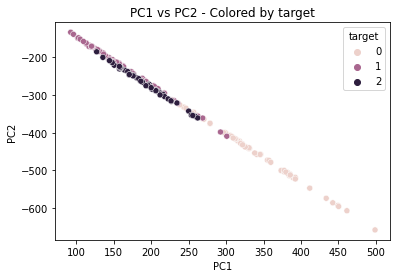

In [ ]:
# Concatenate the dataframe with weights with the target variable
df_plot = pd.concat([df_ToDo5, X['target']], axis=1)

# Rename the column names
df_plot = df_plot.rename(columns={'principal component 1': 'PC1', 'principal component 2': 'PC2', 0:'target'})

# Plot
import seaborn as sns
ax = sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='target')
_ = ax.set_title('PC1 vs PC2 - Colored by target')

**My Plot Interpretation**

Looking at the plot below, I can observe the tendency where target 0 belongs to where PC1 is higher than 250 and PC2 is lower than -350.

Target 1 seems to belong to where PC1 is pretty low (< 130) and PC2 is high (> -250), and Target 2 seems to belong to the middle area where PC1 is between 120 ad 250 and PC2 is between -200 and -400.

### Problem 6

**Dataset:** Life Expectancy

**Introduction:** The above dataset gives life expectancy related data for 37 countries in2014. 

Consider only the following variables in your analysis: 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.

In [ ]:
#Import modules
from sklearn.manifold import MDS
import seaborn as sns
from sklearn import preprocessing

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Life Expectancy.csv") 
df.head()

Saving Life Expectancy.csv to Life Expectancy.csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Australia,2014,Developed,82.7,6,1,9.71,10769.363050,91.0,340,...,92,9.42,92,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
2,Austria,2014,Developed,81.4,66,0,12.32,8350.193523,98.0,117,...,98,11.21,98,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
3,Bangladesh,2014,Developing,71.4,132,98,0.01,10.446403,97.0,289,...,97,2.82,97,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
4,Belgium,2014,Developed,89.0,76,0,12.60,7163.348923,98.0,70,...,99,1.59,99,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


**TODO:**

* Standardize the numeric variables in the given data frame
* Run MDS() (Multi Dimensional Scaling) on the standardized data
* Plot data points on a 2D plane defined by the first two components
* Use color to differentiate the statues of each country with legend
* Use text label to specify the country name for each point
* Comment your findings from the graph

In [ ]:
# Hepatitis B contains 3 NaNs
print(df.isnull().sum())
df[df['Hepatitis B'].isnull()]

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        3
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
14,Denmark,2014,Developed,84.0,73,0,9.64,10468.762920,NaN,27,...,94,1.80,94,0.1,62425.53920,5643475.0,1.1,0.9,0.926,19.2
22,Japan,2014,Developed,83.5,57,2,0.01,88.833622,NaN,462,...,99,1.23,96,0.1,3896.21151,127276.0,2.0,1.7,0.899,15.3
32,Switzerland,2014,Developed,83.2,51,0,9.61,19479.911610,NaN,23,...,96,11.66,96,0.1,85814.58857,8188649.0,0.4,0.3,0.936,15.9


In [ ]:
# If I remove these rows, I will completely lose the data about these three countries. Thus, I will impute these NaNs with the mean of Hepatitis B column.
df['Hepatitis B'].fillna(value=df['Hepatitis B'].mean(), inplace=True)
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [ ]:
# Standardize the numerical variables
df.iloc[:, 3:] = preprocessing.scale(df.iloc[:, 3:])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,-1.517367,1.243871,-0.046452,-1.082462,-0.526543,-0.561837,-0.317693,...,-0.970515,0.619128,-0.891875,-0.411981,-0.643117,-0.297465,1.971357,1.801683,-1.567660,-1.158371
1,Australia,2014,Developed,0.911111,-1.242096,-0.401464,1.159808,2.048225,0.601969,-0.326338,...,0.437683,1.017244,0.436959,-0.411981,2.180926,-0.287950,-0.692190,-0.781652,1.236204,2.140971
2,Austria,2014,Developed,0.772645,-0.679236,-0.407099,1.763140,1.465868,0.882887,-0.339019,...,0.686189,1.591945,0.702725,-0.411981,1.681597,-0.258756,-0.503062,-0.567648,0.968009,0.713371
3,Bangladesh,2014,Developing,-0.292477,-0.060089,0.145142,-1.082462,-0.541727,0.842756,-0.329238,...,0.644771,-1.101762,0.658431,-0.411981,-0.662744,-0.223865,2.065921,1.969830,-0.994696,-1.158371
4,Belgium,2014,Developed,1.582138,-0.585425,-0.407099,1.827866,1.180163,0.882887,-0.341692,...,0.727607,-1.496667,0.747020,-0.411981,1.503576,-0.298476,-0.629147,-0.720508,0.955818,0.840269


In [ ]:
# Run MDS() on numerical variables with the euclidean dissimilarity measure and n_components=2

mds = MDS(n_components=2, dissimilarity='euclidean')
mds_result = mds.fit_transform(df.iloc[:, 3:])

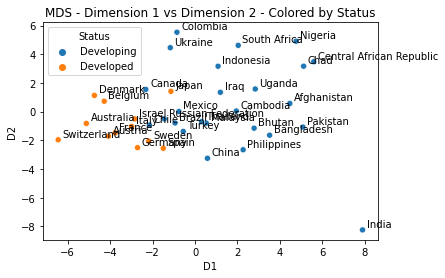

In [ ]:
# Plot data points on a 2D plane defined by the first two components
# Use color to differentiate the statues of each country with legend
# Use text label to specify the country name for each point

mds_df = pd.DataFrame(mds_result, columns=['D1', 'D2'])
mds_df = pd.concat([df.iloc[:, :3], mds_df], axis=1)

ax = sns.scatterplot(data=mds_df, x='D1', y='D2', hue='Status')
ax.set_title('MDS - Dimension 1 vs Dimension 2 - Colored by Status')

# Add text labels to each point
for i, v in enumerate(mds_df['Country']):
  ax.text(mds_df.loc[i, 'D1']+0.2, mds_df.loc[i, 'D2']+0.2, mds_df.loc[i, 'Country'])

# Define figure size
sns.set(rc={"figure.figsize":(20, 10)})

_ = ax.plot()


# References:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
# https://datascience.stackexchange.com/questions/14290/multidimensional-scaling-with-categorical-data

**My Findings**

In the plot above, I can see that the developed countries have low D1 and D2 and position themselves at the bottom left corner.

On the other hand, the developing counties locate in the lower right area of this plot (D1 > -2, D2 < 5) expept for India.